In [1]:
import rank
import numpy as np
import pandas as pd
import scipy.sparse as ss
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

Kaufmann's 
=========

Summary statistics
--------

In [2]:
Raw = pd.read_csv('..\\data\\animal\\Liz suggestions\\Kaufmann1974-7.csv')
A = Raw.values[0:, 1:].astype(int)
A_sparse = ss.csr_matrix(A)

In [3]:
scores, correlation = rank.spring_rank(A, return_correlation=True)

Note: Nodes are ordered by scores (increasing) in orrelation matrix


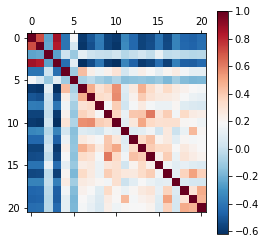

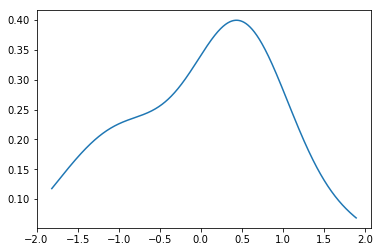

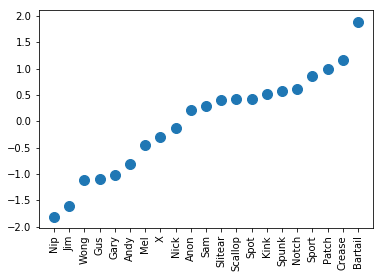

In [6]:
rank.plot(correlation = correlation, scores = scores, labels = Raw.columns.values[1:])

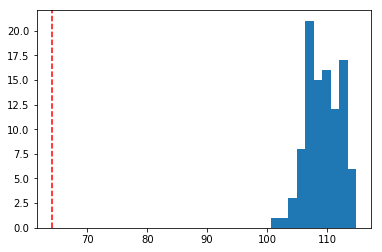

0.0

In [4]:
rank.test_ranks_significance(A, plot=True)

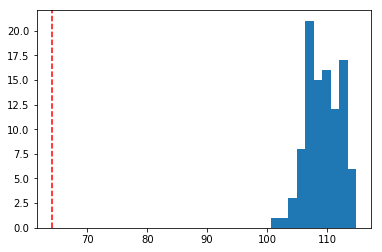

{'% Viol.': 0.14705882352941177,
 'Data name': 'Animal fight',
 'Data type': 'dominance',
 'Depth': 3.7050731159787453,
 'Energy per edge': 0.26924491463200528,
 'Min. Viol.': 16,
 'N': 21,
 'Viol.': 35,
 'Weighted viol.': 3.3023424070147165,
 'p-value': 0.0}

In [4]:
rank.summary(A, data_name="Animal fight", data_type="dominance")

Communities
-------

In [13]:
clusters_scores, clusters_correlation = rank.community(A, n_clusters=2)

Note: Nodes are ordered by scores (increasing) in orrelation matrix


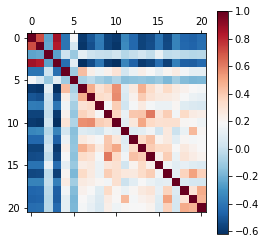

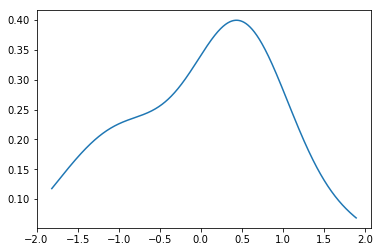

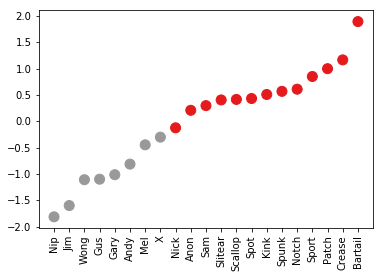

Note: Nodes are ordered by scores (increasing) in orrelation matrix


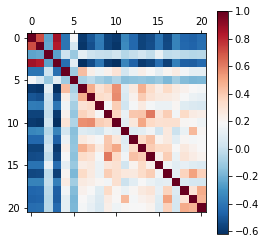

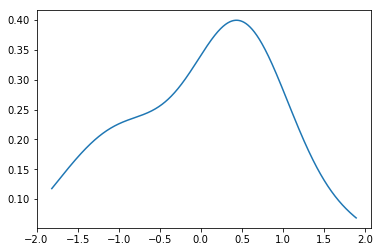

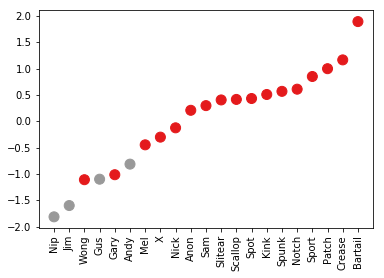

In [14]:
rank.plot(correlation = correlation, scores = scores, labels = Raw.columns.values[1:], community=clusters_scores)
rank.plot(correlation = correlation, scores = scores, labels = Raw.columns.values[1:], community=clusters_correlation)

Parallel Sub-hierarchies?
-------

Most likely there isn't any...


In [4]:
clusters_par = rank.community(A, n_clusters=3, c_type="parallel")

Generating null model ...
Finding clusters ...


Note: Nodes are ordered by scores (increasing) in orrelation matrix


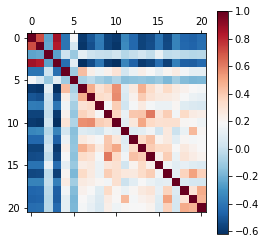

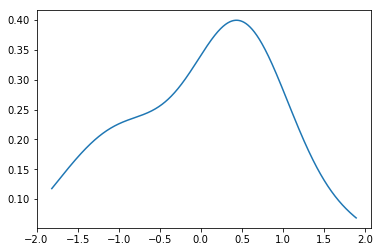

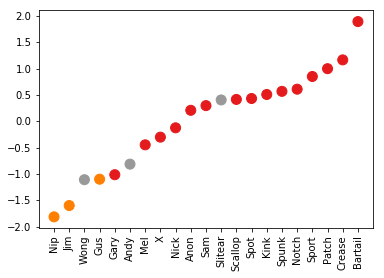

In [7]:
rank.plot(correlation = correlation, scores = scores, labels = Raw.columns.values[1:], community=clusters_par)

Save data for Gephi
------

In [ ]:
#Save data for Gephi

r, c, v = ss.find(A_sparse)
Edge = pd.DataFrame({'Target': r, 'Source' : c, 'Weight': v}) # pd.DataFrame([r, c, v], columns=['Source', 'Target', 'Weight']) why not work?
Edge.to_csv("kaufmann_edges.csv")

In [8]:
Node = pd.DataFrame({'id': range(len(Raw.columns.values[1:])), 'name' : Raw.columns.values[1:], "community_scr" : clusters_scores, 'community_cor' : clusters_correlation, 'community_par': cluster_par, 'ranks': scores})
Node.to_csv("kaufmann_nodes.csv")

NameError: name 'clusters_scores' is not defined